In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift
import pandas as pd
from sklearn import preprocessing

df= pd.read_excel('titanic.xls')
orignal_df= pd.DataFrame.copy(df)
df.drop(['body', 'name'], 1, inplace= True)
#for column in df.columns:
#    pd.to_numeric(df[column])
#print(df.head())

def handle_non_numeric_data(df):
    columns= df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_content=df[column].values.tolist()
            #print(column_content)
            unique_elements= set(column_content)
            #print(unique_elements)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    #print(unique)
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df

df= handle_non_numeric_data(df)
df.dropna(inplace=True)
print(df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    1  29.0000      0      0     780  211.3375     20   
1       1         1    0   0.9167      1      2     519  151.5500     76   
2       1         0    1   2.0000      1      2     519  151.5500     76   
3       1         0    0  30.0000      1      2     519  151.5500     76   
4       1         0    1  25.0000      1      2     519  151.5500     76   

   embarked  boat  home.dest  
0         2     2         27  
1         2    19        330  
2         2     0        330  
3         2     0        330  
4         2     0        330  


In [9]:
#df.drop(['home.dest', 'embarked'], 1, inplace=True)
X= np.array(df.drop(['survived'], 1).astype(float))
X= preprocessing.scale(X)#preprocessing(X)
Y= np.array(df['survived'])

clf= MeanShift()
clf.fit(X)



0.5789473684210527


In [19]:
labels = clf.labels_

cluster_centres= clf.cluster_centers_

orignal_df['cluster_group']= np.nan

for i in range(len(X)):
    orignal_df['cluster_group'].iloc[i]= labels[i]
    
n_clusters_= len(np.unique(labels))

survival_rates = {}
for i in range(n_clusters):
    temp_df= orignal_df[ (orignal_df['cluster_group']==float(i))]
    survival_cluster= temp_df[(orignal_df['survived']==1)]
    survival_rate= len(survival_cluster)/len(temp_df)
    survival_rates[i]= survival_rate
    
print(survival_rates)

c:\users\lovish bml\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.42233502538071066, 1: 0.5625, 2: 0.5714285714285714, 3: 0.3333333333333333}


c:\users\lovish bml\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [21]:
print(orignal_df[(orignal_df['cluster_group']==0)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  985.000000  985.000000  825.000000  985.000000  985.000000  985.000000   
mean     2.145178    0.422335   31.084444    0.437563    0.363452   36.526958   
std      0.841166    0.494182   14.310006    0.799142    0.792421   55.116312   
min      1.000000    0.000000    0.166700    0.000000    0.000000    0.000000   
25%      1.000000    0.000000   22.000000    0.000000    0.000000    8.050000   
50%      2.000000    0.000000   29.000000    0.000000    0.000000   16.000000   
75%      3.000000    1.000000   40.000000    1.000000    0.000000   36.750000   
max      3.000000    1.000000   80.000000    5.000000    6.000000  512.329200   

             body  cluster_group  
count   90.000000          985.0  
mean   155.211111            0.0  
std     93.202509            0.0  
min      9.000000            0.0  
25%     70.500000            0.0  
50%    148.500000            0.0  
75%    242.750000        

3
1.1666666666666667


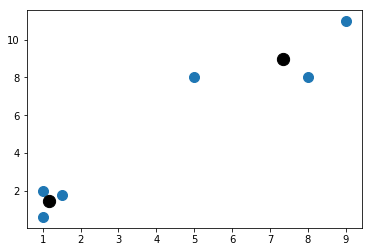

In [37]:
#From Scratch
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])



colors=['r', 'g', 'c', 'b' ]

class Mean_Shift():
    def __init__(self, radius=4):
        self.radius= radius
    def fit(self, data):
        centroids={}
        
        
        for i in range(len(data)):
            centroids[i]= data[i]
        count  =0
        while True:
            count+=1
            new_centroids = []
            
            for i in centroids:
                in_bandwidth= []
                centroid= centroids[i]
                
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)
                new_centroid= np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
            
            uniques= sorted(list(set(new_centroids)))
            
            prev_centroids= dict(centroids)
            
            centroids= {}
            
            for i in range(len(uniques)):
                centroids[i]= np.array(uniques[i])
            
            optimized= True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized= False
                if not optimized:
                    break
            if optimized:
                break
        print(count)
        self.centroids= centroids
        
    def predic(self, data):
        pass
    
clf= Mean_Shift()

clf.fit(X)

centroids= clf.centroids
plt.scatter(X[:, 0], X[:, 1], s= 100)
print(centroids[0][0])
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color= 'k', s=150)
plt.show()




6
1
-2.0307054966292384


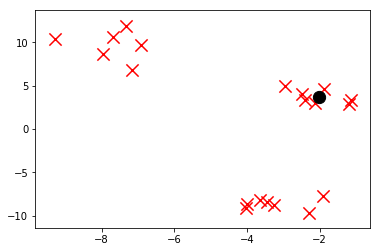

In [84]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

from sklearn.datasets.samples_generator import make_blobs

X, y= make_blobs(n_samples= 20, centers=3, n_features=2)

colors=10*['r', 'g', 'c', 'b', 'k', 'w', 'b']

class Mean_Shift():
    def __init__(self, radius=None, radius_norm_step= 50, ):
        self.radius= radius
        self.radius_norm_step= radius_norm_step
    
    def fit(self, data):
        centroids={}
        if self.radius == None:
            all_data_centroid= np.average(data, axis= 0)
            all_data_norm= np.linalg.norm(all_data_centroid)
            self.radius= all_data_norm/ self.radius_norm_step
        
        
        for i in range(len(data)):
            centroids[i]= data[i]
        count  =0
        
        weights=[i for i in range(self.radius_norm_step)][::-1]
        
        while True:
            count+=1
            new_centroids = []
            
            for i in centroids:
                in_bandwidth= []
                centroid= centroids[i]
                
                for featureset in data:
                    distance= np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance= 0.0000001
                    weight_index= int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index= self.radius_norm_step -1
                    to_add= (weights[weight_index])*[featureset]
                    in_bandwidth+= to_add
                new_centroid= np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
            
            uniques= sorted(list(set(new_centroids)))
            
            to_pop=[]
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)- np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            prev_centroids= dict(centroids)
            
            centroids= {}
            
            for i in range(len(uniques)):
                centroids[i]= np.array(uniques[i])
            
            optimized= True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized= False
                if not optimized:
                    break
            if optimized:
                break
        print(count)
        self.centroids= centroids
        self.classifications={}
        
        for i in range(len(self.centroids)):
            self.classifications[i]=[]
            
        for featureset in data:
            distances= [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification= distances.index(min(distances))
            self.classifications[classification].append(featureset)
        if len(self.centroids)== len(self.classifications):
            print(len(self.classifications))
        
    def predic(self, data):
        distances= [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification= distances.index(min(distances))
        return classification
    
clf= Mean_Shift()

clf.fit(X)

centroids= clf.centroids
#plt.scatter(X[:, 0], X[:, 1], s= 100)
print(centroids[0][0])

for classification in clf.classifications:
    color= colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], c= color, marker='x', s=150)
        
for cx in centroids:
    plt.scatter(centroids[cx][0], centroids[cx][1], c='k',  s=150)
plt.show()